In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

In [ ]:
churn_data=pd.read_csv("/content/customer_churn (1).csv")

In [ ]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
churn_data.drop("customerID",axis=1,inplace=True)

In [ ]:
churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
churn_data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
churn_data.Partner.values

array(['Yes', 'No', 'No', ..., 'Yes', 'Yes', 'No'], dtype=object)

In [ ]:
churn_data1=churn_data[churn_data["TotalCharges"]!=" "]

In [ ]:
churn_data[churn_data["TotalCharges"]==" "].shape

(11, 20)

In [ ]:
churn_data.shape,churn_data1.shape

((7043, 20), (7032, 20))

In [ ]:
churn_data1[churn_data1["TotalCharges"]==" "].shape

(0, 20)

In [ ]:
churn_data1.shape

(7032, 20)

In [ ]:
churn_data1.TotalCharges=pd.to_numeric(churn_data1.TotalCharges )

<ipython-input-86-ddf77f878bc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data1.TotalCharges=pd.to_numeric(churn_data1.TotalCharges )


In [ ]:
type(churn_data["TotalCharges"]),type(churn_data.TotalCharges)

(pandas.core.series.Series, pandas.core.series.Series)

In [ ]:
churn_data1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [ ]:
churn_data1.Churn.values

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [ ]:
churn_data1[churn_data1.Churn=="Yes"].shape

(1869, 20)

In [ ]:
churn_data1[churn_data1.Churn=="No"].shape

(5163, 20)

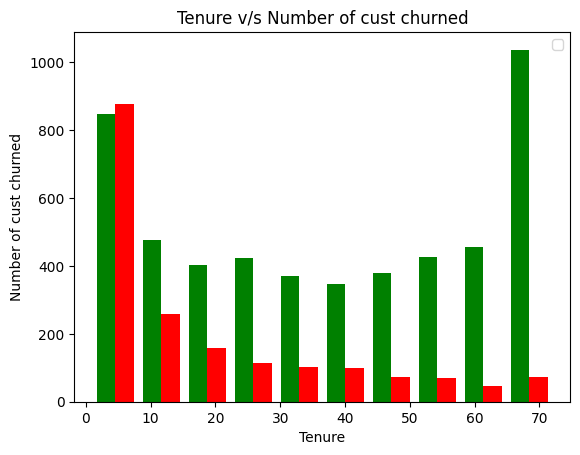

In [ ]:
tenure_churn_no=churn_data1[churn_data1.Churn=="No"].tenure
tenure_churn_yes=churn_data1[churn_data1.Churn=="Yes"].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of cust churned")
plt.title("Tenure v/s Number of cust churned")

plt.hist([tenure_churn_no,tenure_churn_yes],color=["green","red"])
plt.legend()


In [ ]:
churn_data1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:

def col_unique_value(d):
  for col in d:
    print(col,":",d[col].unique())

In [ ]:
col_unique_value(churn_data1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [ ]:
churn_data1.replace("No phone service","No",inplace=True)
churn_data1.replace("No internet service","No",inplace=True)

<ipython-input-99-9c0595387615>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data1.replace("No phone service","No",inplace=True)
<ipython-input-99-9c0595387615>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data1.replace("No internet service","No",inplace=True)


In [ ]:
col_unique_value(churn_data1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [ ]:
yes_no_col=["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

for i in yes_no_col:
  churn_data1[i].replace({"Yes":1,"No":0},inplace=True)

<ipython-input-101-67c4660cdafc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data1[i].replace({"Yes":1,"No":0},inplace=True)


In [ ]:
col_unique_value(churn_data1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [ ]:
churn_data_pro=pd.get_dummies(data=churn_data1,columns=["InternetService","Contract","PaymentMethod"])

In [ ]:
churn_data_pro

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,Male,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,Male,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,Male,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,Female,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,Female,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,Female,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,Male,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler



In [ ]:
col_unique_value(churn_data_pro)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


In [ ]:

col_to_scale=["tenure","MonthlyCharges","TotalCharges"]
scaler=MinMaxScaler()
churn_data_pro[col_to_scale]=scaler.fit_transform(churn_data_pro[col_to_scale])

In [ ]:
churn_data_pro.replace({'Male':1,'Female':0,'No':0},inplace=True)

In [ ]:
col_unique_value(churn_data_pro)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [ ]:
X=churn_data_pro.drop("Churn",axis="columns")
y=churn_data_pro["Churn"]

In [ ]:
from sklearn.model_selection  import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))

In [ ]:

churn_data_pro.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
model=keras.Sequential([

    keras.layers.Dense(1,input_shape=(26,),activation='relu')])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(X_train,y_train,epochs=100,batch_size=100)

Epoch 1/100
57/57 [==============================] - 1s 2ms/step - loss: 3.9148 - accuracy: 0.5961
Epoch 2/100
57/57 [==============================] - 0s 3ms/step - loss: 3.6607 - accuracy: 0.6334
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 3.4984 - accuracy: 0.6599
Epoch 4/100
57/57 [==============================] - 0s 3ms/step - loss: 3.4477 - accuracy: 0.6711
Epoch 5/100
57/57 [==============================] - 0s 3ms/step - loss: 3.4235 - accuracy: 0.6761
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 3.4280 - accuracy: 0.6891
Epoch 7/100
57/57 [==============================] - 0s 3ms/step - loss: 3.4494 - accuracy: 0.6997
Epoch 8/100
57/57 [==============================] - 0s 3ms/step - loss: 3.3917 - accuracy: 0.6965
Epoch 9/100
57/57 [==============================] - 0s 2ms/step - loss: 3.3300 - accuracy: 0.6962
Epoch 10/100
57/57 [==============================] - 0s 3ms/step - loss: 3.1688 - accuracy: 0.6866
Epoch 11/

In [ ]:
##GlorotNormal intializer

model_gl=keras.Sequential([

    keras.layers.Dense(1,input_shape=(26,),activation='relu' , kernel_initializer=keras.initializers.GlorotNormal())])

model_gl.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_gl.fit(X_train,y_train,epochs=100,batch_size=500)

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 4.7502 - accuracy: 0.4786
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 4.4533 - accuracy: 0.4917
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 4.1679 - accuracy: 0.5036
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 3.9547 - accuracy: 0.5124
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 3.6845 - accuracy: 0.5234
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 3.5023 - accuracy: 0.5323
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 3.3454 - accuracy: 0.5397
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 3.1464 - accuracy: 0.5527
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 2.8836 - accuracy: 0.5730
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 2.6892 - accuracy: 0.5908
Epoch 11/

In [ ]:
model_gl=keras.Sequential([

    keras.layers.Dense(1,input_shape=(26,),activation='relu' , kernel_initializer=keras.initializers.GlorotNormal())])

model_gl.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_gl.fit(X_train,y_train,epochs=100,batch_size=500)

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 3.7078 - accuracy: 0.7097
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 3.6766 - accuracy: 0.7097
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 3.6596 - accuracy: 0.7104
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 3.6484 - accuracy: 0.7138
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 3.6245 - accuracy: 0.7140
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 3.5950 - accuracy: 0.7093
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 3.5596 - accuracy: 0.7044
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 3.5400 - accuracy: 0.7028
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 3.5229 - accuracy: 0.7047
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 3.5124 - accuracy: 0.7049
Epoch 11/

In [ ]:
## HeNormal

model_h=keras.Sequential([

    keras.layers.Dense(1,input_shape=(26,),activation='relu' , kernel_initializer=keras.initializers.HeNormal())])

model_h.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_h.fit(X_train,y_train,epochs=100,batch_size=500)

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 2.5289 - accuracy: 0.6412
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 2.3436 - accuracy: 0.6713
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 2.2449 - accuracy: 0.6804
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 2.1477 - accuracy: 0.6869
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 2.1029 - accuracy: 0.6946
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 2.0504 - accuracy: 0.6964
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1.9954 - accuracy: 0.6999
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 1.9840 - accuracy: 0.7022
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 1.9775 - accuracy: 0.7044
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 1.9720 - accuracy: 0.7045
Epoch 11/

In [ ]:
## RandomUniform

model_R=keras.Sequential([

    keras.layers.Dense(1,input_shape=(26,),activation='relu' , kernel_initializer=keras.initializers.RandomUniform())])

model_R.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_R.fit(X_train,y_train,epochs=100,batch_size=500)



Epoch 1/100
12/12 [==============================] - 1s 4ms/step - loss: 1.5964 - accuracy: 0.7342
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7319 - accuracy: 0.7342
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5957 - accuracy: 0.7342
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5648 - accuracy: 0.7342
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5505 - accuracy: 0.7342
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5417 - accuracy: 0.7342
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5341 - accuracy: 0.7342
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5272 - accuracy: 0.7342
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5206 - accuracy: 0.7342
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5142 - accuracy: 0.7342
Epoch 11/

In [ ]:
## LecunNormal

model_L=keras.Sequential([

    keras.layers.Dense(1,input_shape=(26,),activation='relu' , kernel_initializer=keras.initializers.LecunNormal())])

model_L.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_L.fit(X_train,y_train,epochs=100,batch_size=500)




Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 2.1845 - accuracy: 0.6206
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 2.1067 - accuracy: 0.6308
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 2.0618 - accuracy: 0.6359
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 2.0405 - accuracy: 0.6343
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 2.0165 - accuracy: 0.6345
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 1.9866 - accuracy: 0.6373
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1.9424 - accuracy: 0.6459
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 1.9022 - accuracy: 0.6512
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 1.8643 - accuracy: 0.6542
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 1.8370 - accuracy: 0.6571
Epoch 11/

In [ ]:

## VarianceScaling

model_V=keras.Sequential([

    keras.layers.Dense(1,input_shape=(26,),activation='relu' , kernel_initializer=keras.initializers.VarianceScaling())])

model_V.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_V.fit(X_train,y_train,epochs=100,batch_size=500)




Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 3.2501 - accuracy: 0.7211
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 2.9489 - accuracy: 0.7134
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 2.6602 - accuracy: 0.7051
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 2.4122 - accuracy: 0.6962
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 2.2110 - accuracy: 0.6907
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 2.0517 - accuracy: 0.6852
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1.9461 - accuracy: 0.6740
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 1.8641 - accuracy: 0.6722
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 1.7791 - accuracy: 0.6697
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 1.6872 - accuracy: 0.6686
Epoch 11/

In [ ]:
## TruncatedNormal

model_T=keras.Sequential([

    keras.layers.Dense(1,input_shape=(26,),activation='relu' , kernel_initializer=keras.initializers.TruncatedNormal())])

model_T.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_T.fit(X_train,y_train,epochs=100,batch_size=500)




Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 1.5315 - accuracy: 0.7342
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.9568 - accuracy: 0.7337
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8105 - accuracy: 0.7314
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7360 - accuracy: 0.7301
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.7292
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.7287
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6489 - accuracy: 0.7287
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6297 - accuracy: 0.7285
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.7287
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.7289
Epoch 11/

In [ ]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.7541


[0.5435105562210083, 0.7540867328643799]

In [ ]:
y_test_pre=model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [ ]:
y_test_pre.shape

(1407, 1)

In [ ]:
y_test_pre[66]


array([0.5443998], dtype=float32)

In [ ]:
y_predicted=[]
for i in y_test_pre:
  if i<0.5:
    y_predicted.append(0)
  else:
    y_predicted.append(1)

y_predicted[77]




0

In [ ]:
print(classification_report(y_test,y_predicted))

In [ ]:
con_mat=tf.math.confusion_matrix(y_test,y_predicted)

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(con_mat,annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.legend()

In [ ]:
## DROP0UT

model=keras.Sequential([

    keras.layers.Dense(100,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation="sigmoid")])

model_gl.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_gl.fit(X_train,y_train,epochs=100,batch_size=100)



In [ ]:
## DROP0UT

model_d=keras.Sequential([

    keras.layers.Dense(100,input_shape=(26,),activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation="sigmoid")])

model_d.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_d.fit(X_train,y_train,epochs=100,batch_size=100)



In [ ]:
## Normalization

model_nor=keras.Sequential([

    keras.layers.Dense(100,input_shape=(26,)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1,activation="sigmoid")])

model_nor.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_nor.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4990 - accuracy: 0.7419
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.7852
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4354 - accuracy: 0.7943
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4246 - accuracy: 0.7995
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4225 - accuracy: 0.8004
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4137 - accuracy: 0.8060
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4123 - accuracy: 0.8062
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8039
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8076
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4118 - accura

In [ ]:
model_nor.evaluate(X_train,y_train)

In [ ]:
## Normalization

model_nor=keras.Sequential([

    keras.layers.Dense(100,input_shape=(26,)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(100),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1,activation="sigmoid")])

model_nor.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_nor.fit(X_train,y_train,epochs=100)

In [ ]:
##OPTIMIZERS

In [ ]:
model_opt=keras.Sequential([

    keras.layers.Dense(100,input_shape=(26,)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(100),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1,activation="sigmoid")])

model_opt.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_opt.fit(X_train,y_train,epochs=100)


In [ ]:
model_opt=keras.Sequential([

    keras.layers.Dense(100,input_shape=(26,)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(100),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1,activation="sigmoid")])

model_opt.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_opt.fit(X_train,y_train,epochs=100)


In [ ]:
model_A=keras.Sequential([

    keras.layers.Dense(100,input_shape=(26,)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(100),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1,activation="sigmoid")])

model_A.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_A.fit(X_train,y_train,epochs=100)


In [ ]:
model_L=keras.Sequential([

    keras.layers.Dense(100,input_shape=(26,)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(100),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1,activation="sigmoid")])

model_L.compile(optimizer=keras.optimizers.Lion(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_L.fit(X_train,y_train,epochs=100)


Epoch 1/100
176/176 [==============================] - 6s 10ms/step - loss: 0.4724 - accuracy: 0.7668
Epoch 2/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4537 - accuracy: 0.7849
Epoch 3/100
176/176 [==============================] - 2s 10ms/step - loss: 0.4569 - accuracy: 0.7819
Epoch 4/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4498 - accuracy: 0.7911
Epoch 5/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4523 - accuracy: 0.7856
Epoch 6/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4728 - accuracy: 0.7808
Epoch 7/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4654 - accuracy: 0.7826
Epoch 8/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4660 - accuracy: 0.7828
Epoch 9/100
176/176 [==============================] - 3s 15ms/step - loss: 0.4711 - accuracy: 0.7781
Epoch 10/100
176/176 [==============================] - 2s 11ms/step - loss: 0.4621 - ac

In [ ]:
model_G=keras.Sequential([

    keras.layers.Dense(100,input_shape=(26,)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(100),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1,activation="sigmoid")])

model_G.compile(optimizer=keras.optimizers.Adafactor(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_G.fit(X_train,y_train,epochs=100)


Epoch 1/100
176/176 [==============================] - 3s 5ms/step - loss: 0.4746 - accuracy: 0.7675
Epoch 2/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4408 - accuracy: 0.7911
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4257 - accuracy: 0.7959
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4297 - accuracy: 0.7973
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4227 - accuracy: 0.8018
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4171 - accuracy: 0.8043
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4134 - accuracy: 0.8048
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4118 - accuracy: 0.8046
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4150 - accuracy: 0.8014
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4103 - accura